In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv", skipinitialspace=True).drop(columns=['loan_id'])

df['loan_status'] = df['loan_status'].map({ 'Approved' : 1, 'Rejected' : 0 })
df['self_employed'] = df['self_employed'].map({ 'No' : 0, 'Yes' : 1 })
df['education'] = df['education'].map({ 'Graduate' : 1, 'Not Graduate' : 0 })

Approved loans are 1, rejected is 0.

In [3]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [4]:
import seaborn as sns

array([[<Axes: title={'center': 'no_of_dependents'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'self_employed'}>],
       [<Axes: title={'center': 'income_annum'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_term'}>],
       [<Axes: title={'center': 'cibil_score'}>,
        <Axes: title={'center': 'residential_assets_value'}>,
        <Axes: title={'center': 'commercial_assets_value'}>],
       [<Axes: title={'center': 'luxury_assets_value'}>,
        <Axes: title={'center': 'bank_asset_value'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

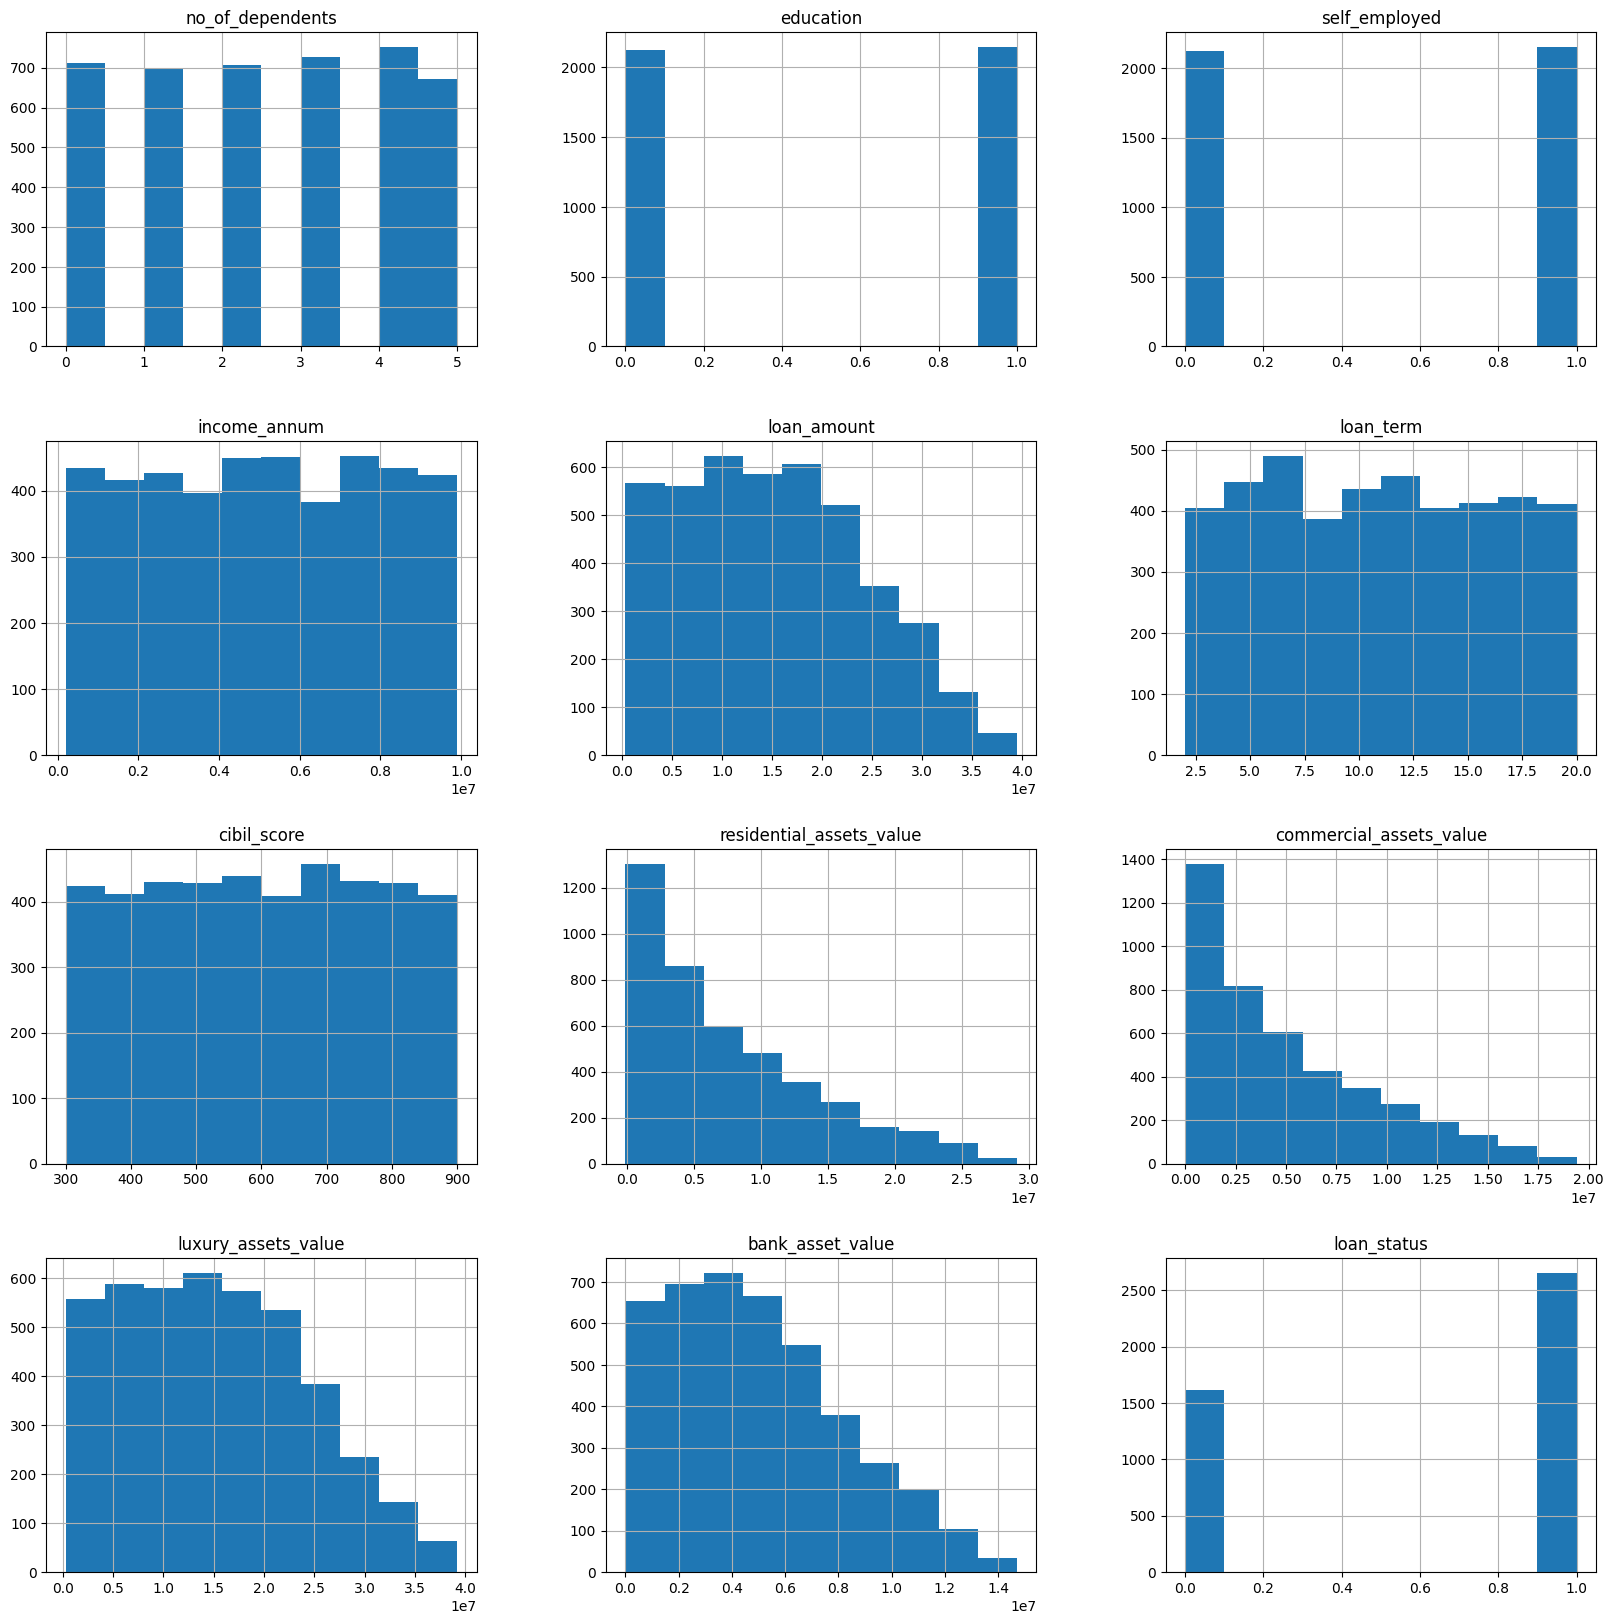

In [5]:
df.hist(figsize=(20,20))

<Axes: >

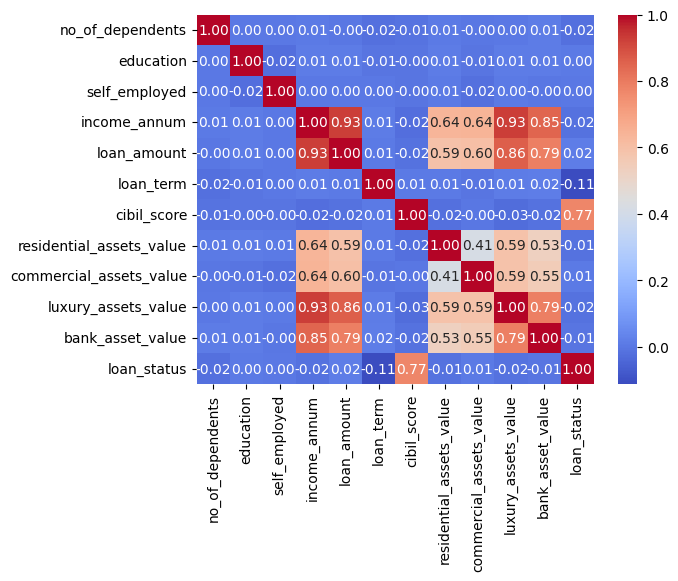

In [6]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [8]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=42, test_size=0.25
    
)
models = {
    'scaled_rf' : make_pipeline(StandardScaler(),RandomForestClassifier(class_weight='balanced')),
    'rf': RandomForestClassifier(class_weight='balanced'),
    'scaled_rf_nobalance': make_pipeline(StandardScaler(),RandomForestClassifier(class_weight='balanced'))
}

for key, model in models.items():
    model.fit(X_train, y_train)


In [9]:
ypreds = []
for key, model in models.items():
    ypreds.append((key, model.predict(X_test)))

In [10]:
scores=[]
for key,model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    precision_scores = cross_val_score(model, X, y, cv=5, scoring="precision")
    recall_scores = cross_val_score(model, X, y, cv=5, scoring="recall")
    
    scores.append({ 'key': key, 'accuracy' : accuracy_scores.mean(), 'precision': precision_scores.mean(), 'recall': recall_scores.mean()})

scores

[{'key': 'scaled_rf',
  'accuracy': 0.9824317534751297,
  'precision': 0.9807002228006606,
  'recall': 0.9894574005635558},
 {'key': 'rf',
  'accuracy': 0.9798545428587901,
  'precision': 0.9810612212430934,
  'recall': 0.9928458151027286},
 {'key': 'scaled_rf_nobalance',
  'accuracy': 0.9814949853252468,
  'precision': 0.9799360600043385,
  'recall': 0.9909632839160046}]

In [11]:
from sklearn.metrics import classification_report

for key, y_pred in ypreds:
    print(key+ " ::")
    print(classification_report(y_test, y_pred))

scaled_rf ::
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       390
           1       0.98      0.99      0.99       678

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068

rf ::
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       390
           1       0.99      0.99      0.99       678

    accuracy                           0.99      1068
   macro avg       0.99      0.99      0.99      1068
weighted avg       0.99      0.99      0.99      1068

scaled_rf_nobalance ::
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       390
           1       0.98      0.99      0.99       678

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.9